this is my jupyter notebook

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('mymoviedb.csv',lineterminator = '\n')

In [3]:
df.head()


,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


see different type of genre

In [5]:
df['Genre'].head()

0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
Name: Genre, dtype: object

check duplicated

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


Exploratio Samary

we have a data frame consisting of  9827  rows  and 9 column.
Our  data looks a bit tidy with no Nans nor duplicated values.
Release_Date column need to be casted into date time and to extract only the year value.
Overview, Original_language and Poster-Url wouldn't be so useful during analysis,so we'll drop them.
there is noticable outliers in popularity column
Vote_Average better be categorised for proper analysis.
genre column has comma saperated values and white spaces that needs to be haldled and casted into category 

In [8]:
df['Release_Date']=pd.to_datetime(df['Release_Date'])
print(df['Release_Date'].dtype)                                  

datetime64[ns]


In [9]:
df['Release_Date']=df['Release_Date'].dt.year
df['Release_Date'].dtype

dtype('int32')

Dropping the column

In [14]:
cols =['Overview','Original_Language','Poster_Url']

In [15]:
df.drop(cols,axis=1,inplace=True)
df.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

Categorizing vote_Aerage column

We would cut the Vote_Average Values and make 4 categories: popular avarage below_avg not_popular to describe it more using categories_col() function provided above

here i create a user define function

In [16]:
def categories_col(df,col,labels):
    edges=[df[col].describe()['min'],
           df[col].describe()['25%'],
           df[col].describe()['50%'],
           df[col].describe()['75%'],
           df[col].describe()['max']]
    df[col]=pd.cut(df[col],edges,labels=labels,duplicates='drop')
    return df

In [17]:
labels=['not_popular','below_avg','avarage','popular']
categories_col(df,'Vote_Average',labels)
df['Vote_Average'].unique()

['popular', 'below_avg', 'avarage', 'not_popular', NaN]
Categories (4, object): ['not_popular' < 'below_avg' < 'avarage' < 'popular']

In [18]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_avg,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,avarage,"Action, Adventure, Thriller, War"


In [19]:
df['Vote_Average'].value_counts()

Vote_Average
not_popular    2467
popular        2450
avarage        2412
below_avg      2398
Name: count, dtype: int64

In [20]:
df.dropna(inplace=True)
df.isna().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

In [21]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_avg,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,avarage,"Action, Adventure, Thriller, War"


remove the white space and also i want that every genre came in new line 

In [25]:
df['Genre']= df['Genre'].str.split(', ')
df= df.explode('Genre').reset_index(drop=True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action,"[Action, Adventure, Science Fiction]"
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure,"[Action, Adventure, Science Fiction]"
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction,"[Action, Adventure, Science Fiction]"
3,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action,"[Action, Adventure, Science Fiction]"
4,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure,"[Action, Adventure, Science Fiction]"


In [29]:
df.drop('genre',axis=1,inplace=True)

In [30]:
df.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

In [31]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
4,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure


In [32]:
df['Genre']=df['Genre'].astype('category')
df['Genre'].dtype

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79364 entries, 0 to 79363
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  79364 non-null  int32   
 1   Title         79364 non-null  object  
 2   Popularity    79364 non-null  float64 
 3   Vote_Count    79364 non-null  int64   
 4   Vote_Average  79364 non-null  category
 5   Genre         79364 non-null  category
dtypes: category(2), float64(1), int32(1), int64(1), object(1)
memory usage: 2.3+ MB


In [34]:
df.nunique()

Release_Date     100
Title           9415
Popularity      8088
Vote_Count      3265
Vote_Average       4
Genre             19
dtype: int64

In [35]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
4,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure


Data Visualization

In [36]:
sns.set_style('darkgrid')

what is the most frequent genre of movies release on Netflix

In [37]:
df['Genre'].describe()

count     79364
unique       19
top       Drama
freq      10000
Name: Genre, dtype: object

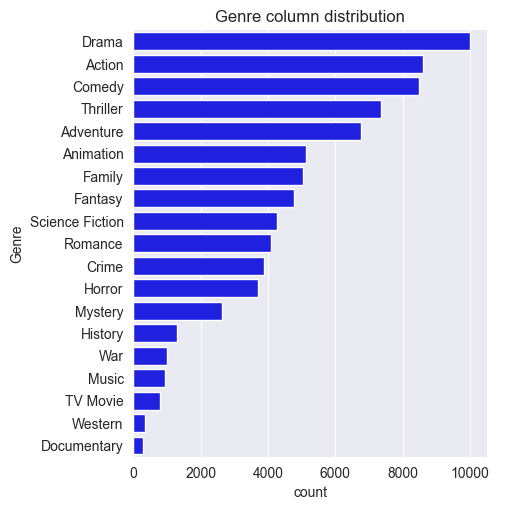

In [39]:
sns.catplot(y='Genre',data=df,kind='count',order=df['Genre'].value_counts().index,color='blue')
plt.title('Genre column distribution')
plt.show()

Which has highest vote in vote avg column?

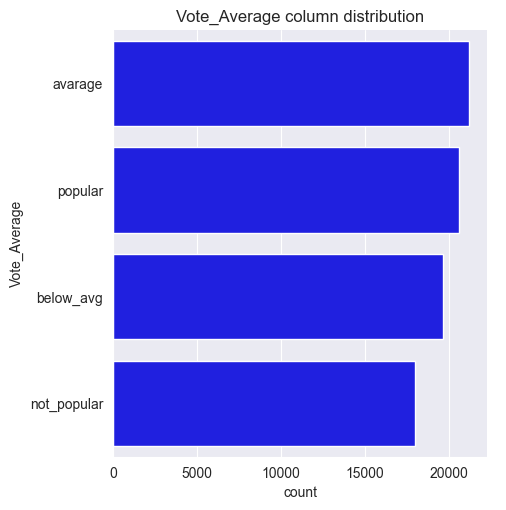

In [40]:
sns.catplot(y='Vote_Average',data=df,kind='count',order=df['Vote_Average'].value_counts().index,color='blue')
plt.title('Vote_Average column distribution')
plt.show()

what movie got the higest popularity?what's its genre?

In [ ]:
df[df['Popularity']==df['Popularity'].max()] 

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
4,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
5,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
6,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
7,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
8,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction


what movie got the lowest popularity?what's its genre

In [42]:
df[df['Popularity']==df['Popularity'].min()] 

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
79346,2021,The United States vs. Billie Holiday,13.354,152,avarage,Music
79347,2021,The United States vs. Billie Holiday,13.354,152,avarage,Drama
79348,2021,The United States vs. Billie Holiday,13.354,152,avarage,History
79349,2021,The United States vs. Billie Holiday,13.354,152,avarage,Music
79350,2021,The United States vs. Billie Holiday,13.354,152,avarage,Drama
79351,2021,The United States vs. Billie Holiday,13.354,152,avarage,History
79352,2021,The United States vs. Billie Holiday,13.354,152,avarage,Music
79353,2021,The United States vs. Billie Holiday,13.354,152,avarage,Drama
79354,2021,The United States vs. Billie Holiday,13.354,152,avarage,History
79355,1984,Threads,13.354,186,popular,War


which year has the most filmmed movies ?

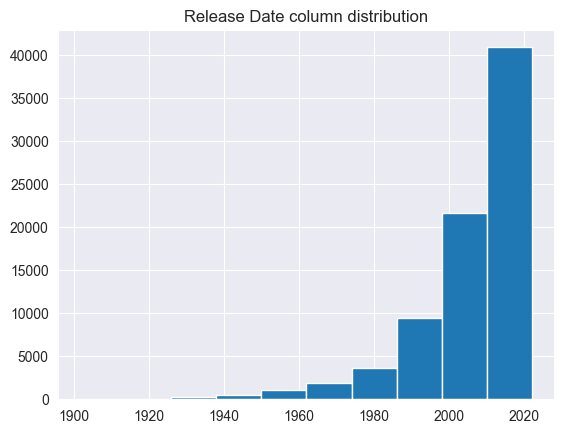

In [43]:
df['Release_Date'].hist()
plt.title('Release Date column distribution')
plt.show()